# Bike Sharing Demand - Pushpendra Kumar

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import datetime
from scipy.stats import pearsonr


# Importing CSV Data

In [2]:
bikes_data = pd.read_csv('C:/Users/Usr/Desktop/UPGRADE/bike sharing/day.csv')
data_import_shape = bikes_data.shape
data_import_shape

(730, 16)

In [3]:
bikes_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Checking for Null Values

In [4]:
count=bikes_data.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes_data.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Visualising the Data

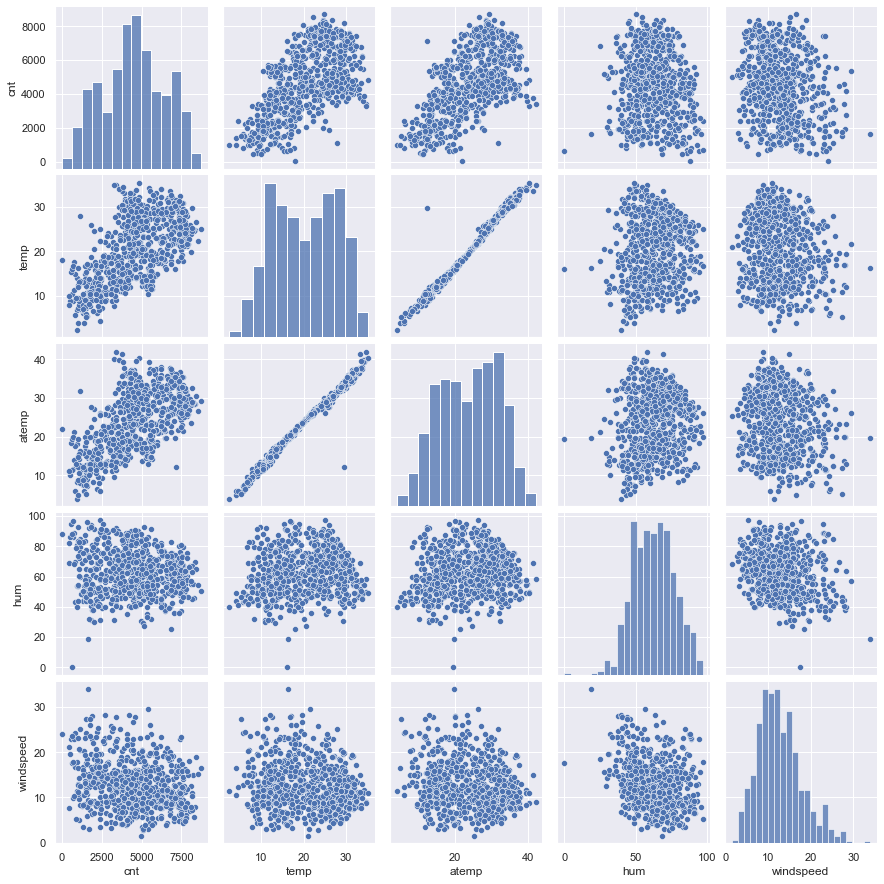

In [7]:
sns.pairplot(data=bikes_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

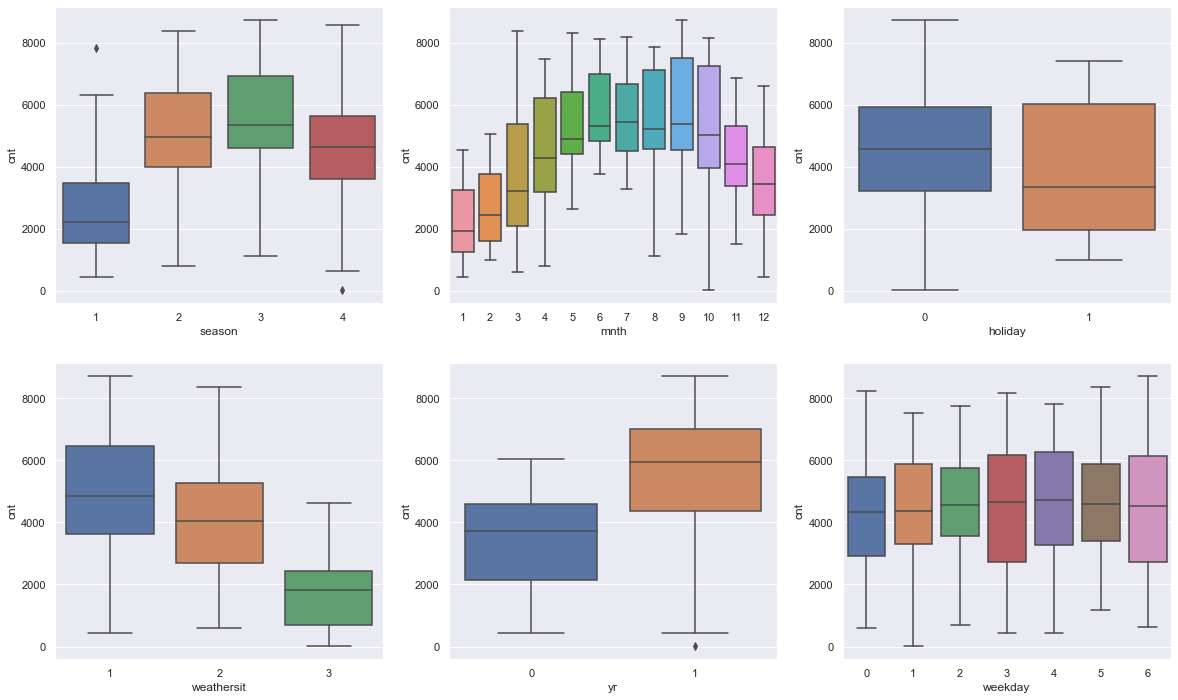

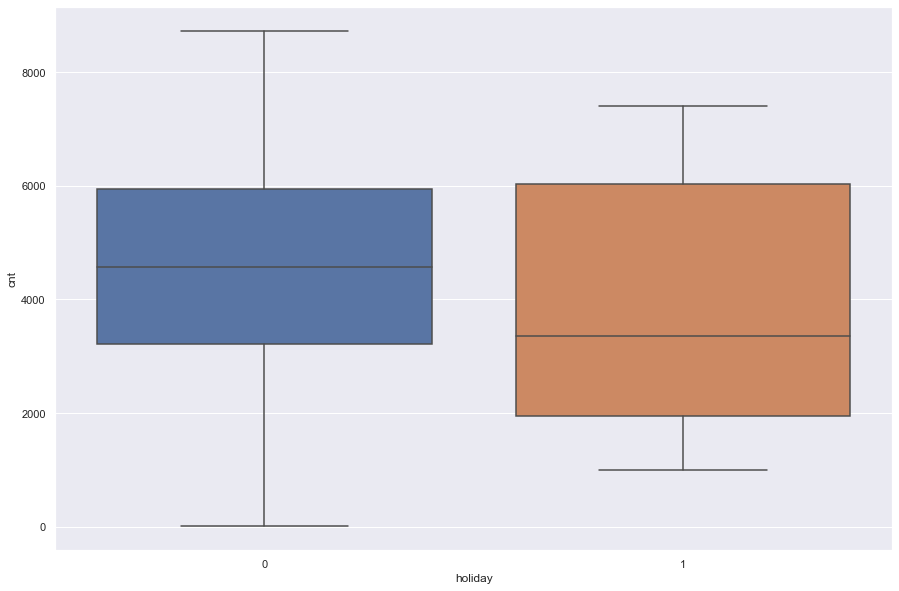

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_data)
plt.show()
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_data)
plt.show()

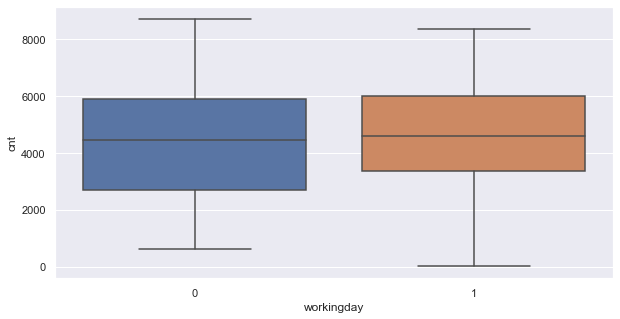

In [9]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_data)
plt.show()


In [10]:
bikes_data.season.describe()


count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [11]:
bikes_data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikes_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
doc_know = bikes_data['season'].value_counts()   # frequency of different category in active column.
print(doc_know)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


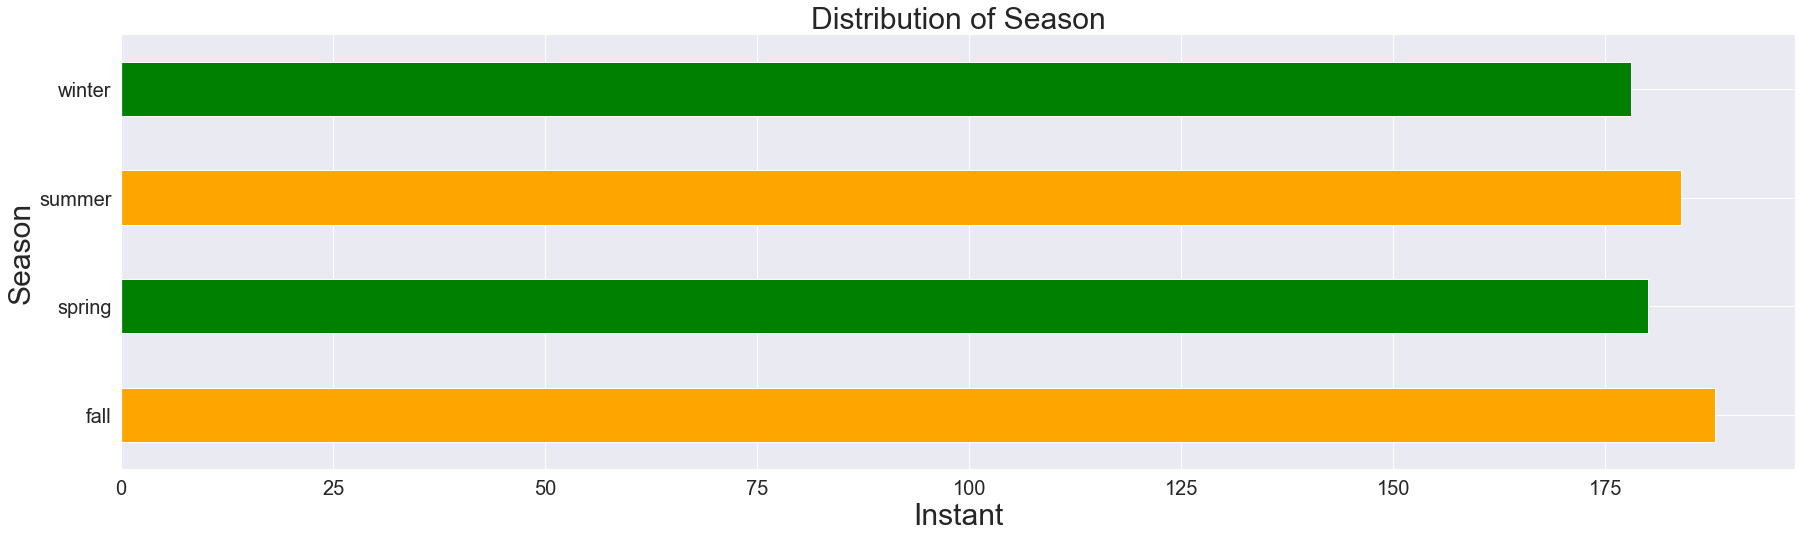

In [13]:
# plot bar graph for frequency of different category in active column.
doc_know = [doc_know[0],doc_know[1],doc_know[2],doc_know[3]]
doc_know
bikes_data.groupby('season') \
    .count()['instant'] \
    .plot(kind='barh',color=['orange','green'],fontsize=20, 
          figsize=(30, 8))
   
plt.title('Distribution of Season',fontsize=30)
plt.xlabel('Instant',fontsize=30)
plt.ylabel('Season',fontsize=30) 
plt.show()

In [14]:
bikes_data.weathersit.describe()


count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [15]:
bikes_data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bikes_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [16]:
doc_know1 = bikes_data['weathersit'].value_counts()   # frequency of different category in active column.
print(doc_know1)

Clear_Few Clouds                      463
Mist_cloudy                           246
Light rain_Light snow_Thunderstorm     21
Name: weathersit, dtype: int64


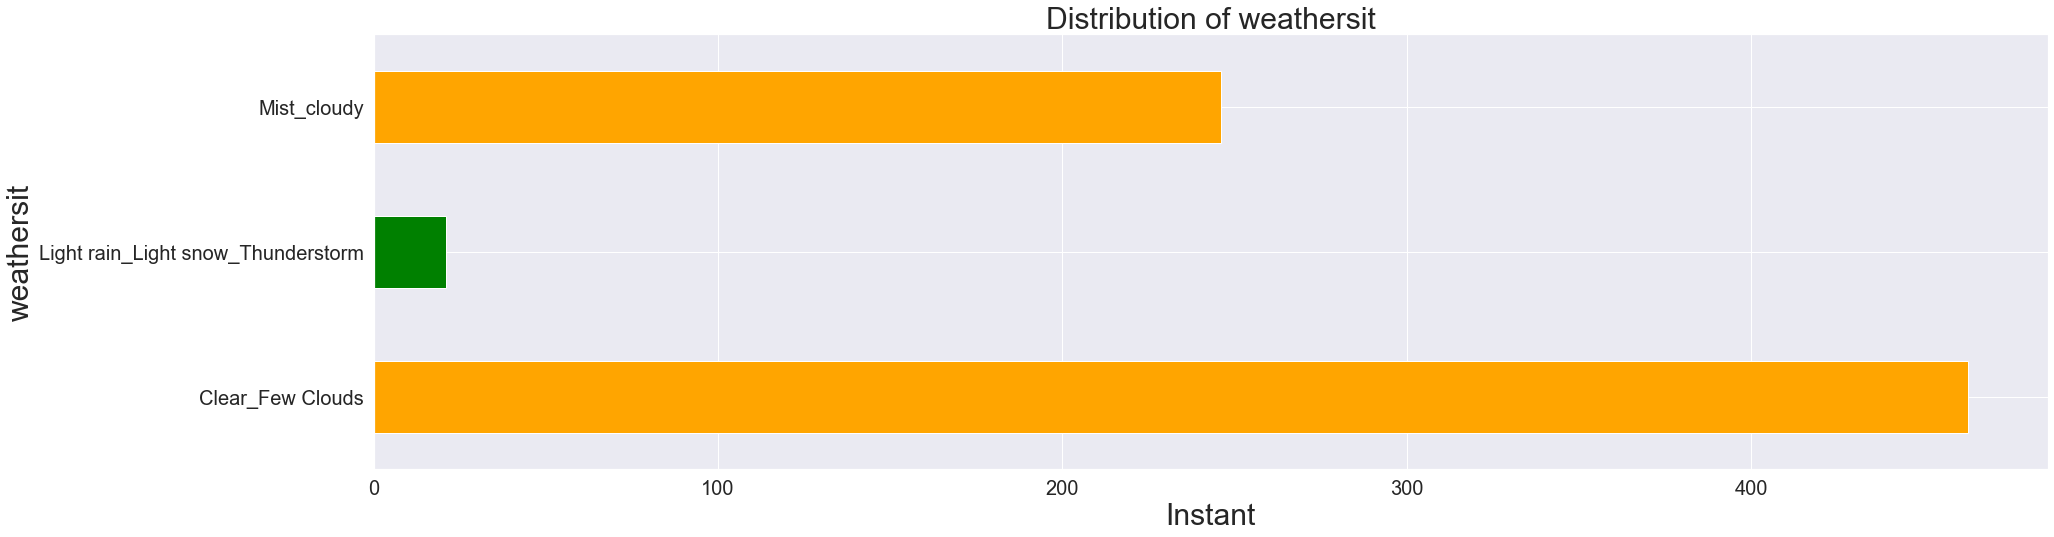

In [17]:
doc_know1 = [doc_know1[0],doc_know1[1],doc_know1[2]]
doc_know1
bikes_data.groupby('weathersit') \
    .count()['instant'] \
    .plot(kind='barh',color=['orange','green'],fontsize=20, 
          figsize=(30, 8))

plt.title('Distribution of weathersit',fontsize=30)
plt.xlabel('Instant',fontsize=30)
plt.ylabel('weathersit',fontsize=30) 
plt.show()

In [18]:
bikes_data.weekday.describe()


count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [19]:
bikes_data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikes_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [20]:
doc_know2 = bikes_data['weekday'].value_counts()   # frequency of different category in active column.
print(doc_know2)

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64


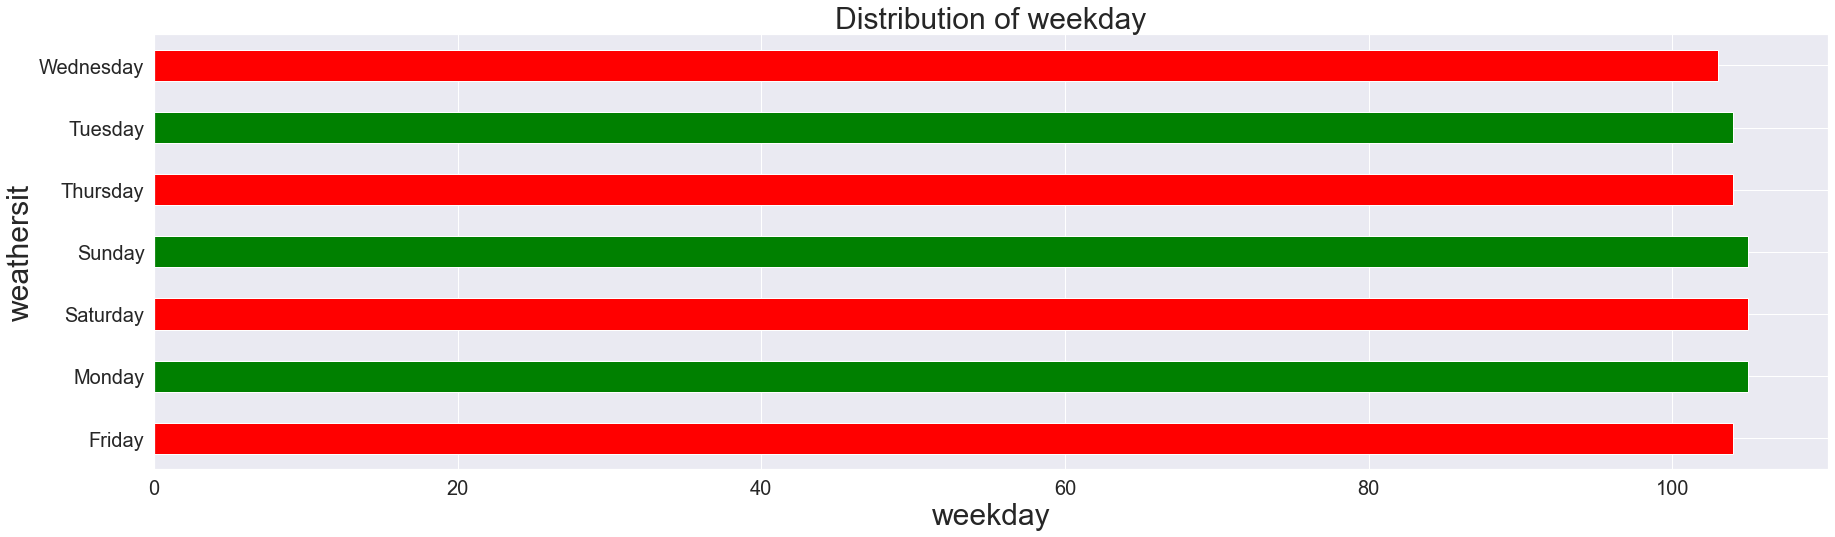

In [21]:
doc_know2 = [doc_know2[0],doc_know2[1],doc_know2[2],doc_know2[3],doc_know2[4],doc_know2[5],doc_know2[6]]
doc_know2
bikes_data.groupby('weekday') \
    .count()['instant'] \
    .plot(kind='barh',color=['Red','green'],fontsize=20, 
          figsize=(30, 8))

plt.title('Distribution of weekday',fontsize=30)
plt.xlabel('weekday',fontsize=30)
plt.ylabel('weathersit',fontsize=30) 
plt.show() 

In [22]:
bikes_data.dteday.describe()

count            730
unique           730
top       20-12-2019
freq               1
Name: dteday, dtype: object

In [23]:
# check if any of the date range is outside certain limi

bikes_data['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [24]:
# check if any of the month range is outside certain limit

bikes_data['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [25]:
#  check if any of the year range is outside certain limit

bikes_data['dteday'].apply(lambda x: int(x.split('-')[2])).describe()


count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

In [26]:
# date, month & year are in the valid range, hence we can proceed ahead with this column without dropping.

# extract only the date part from this column and use it.

bikes_data['dteday'] = bikes_data['dteday'].apply(lambda x: int(x.split('-')[0]))


In [27]:
# ename the column name from 'dteday' to 'date'

bikes_data = bikes_data.rename(columns={"dteday": "date"})


In [28]:
print(bikes_data.columns)

Index(['instant', 'date', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [29]:
bikes_data.describe()

,instant,date,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,15.720548,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,8.802278,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,8.000000,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,16.000000,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,23.000000,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,31.000000,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [30]:
bikes_data[bikes_data['hum'] == 0]


,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,10,spring,0,3,0,Thursday,1,Light rain_Light snow_Thunderstorm,15.952731,19.2834,0.0,17.545759,46,577,623


In [31]:
humidity_check = bikes_data[(bikes_data.index > int(69*0.8)) & (bikes_data.index < int(69*1.2))]
humidity_check

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,26,spring,0,2,0,Saturday,0,Clear_Few Clouds,11.582500,14.10960,53.7917,12.500257,424,1545,1969
57,58,27,spring,0,2,0,Sunday,0,Clear_Few Clouds,14.082598,17.55545,68.0000,8.391616,694,1708,2402
58,59,28,spring,0,2,0,Monday,1,Mist_cloudy,16.698193,20.00590,87.6364,19.408962,81,1365,1446
59,60,1,spring,0,3,0,Tuesday,1,Clear_Few Clouds,10.933347,13.19395,53.5000,14.500475,137,1714,1851
60,61,2,spring,0,3,0,Wednesday,1,Clear_Few Clouds,13.735000,16.00355,44.9583,20.624811,231,1903,2134
61,62,3,spring,0,3,0,Thursday,1,Clear_Few Clouds,8.131653,10.00665,31.8333,15.125518,123,1562,1685
62,63,4,spring,0,3,0,Friday,1,Mist_cloudy,10.728347,12.78395,61.0417,13.624182,214,1730,1944
63,64,5,spring,0,3,0,Saturday,0,Mist_cloudy,15.750847,18.93895,78.9167,16.875357,640,1437,2077
64,65,6,spring,0,3,0,Sunday,0,Mist_cloudy,15.437402,18.31260,94.8261,23.000229,114,491,605
65,66,7,spring,0,3,0,Monday,1,Clear_Few Clouds,10.731299,11.92305,55.1304,22.870584,244,1628,1872


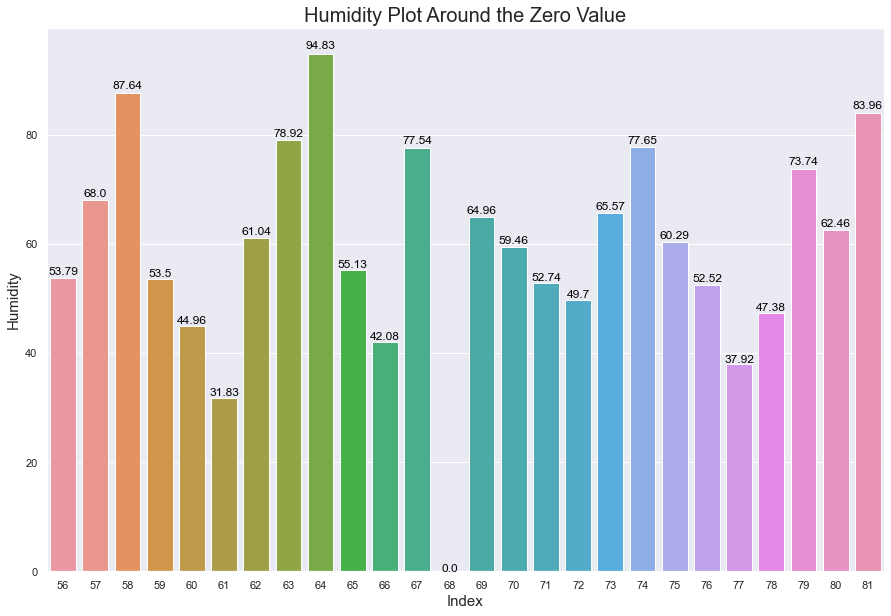

In [32]:
graph = sns.barplot(y=humidity_check.hum, x=humidity_check.index)
plt.title('Humidity Plot Around the Zero Value', fontdict={'fontsize': 20})
plt.xlabel('Index', fontdict={'fontsize': 15})
plt.ylabel('Humidity', fontdict={'fontsize': 15})
counter = 0
for index, row in humidity_check.iterrows():
    graph.text(counter, row.hum*1.01, round(row.hum, 2), color='black', ha="center")
    counter+=1
plt.show()

In [33]:
# Imputing the mean value at the zero humidity level
mean_value = humidity_check.hum.mean()
mean_value

59.137907692307685

In [34]:
bikes_data.at[int(bikes_data[bikes_data['hum'] == 0.0].hum.index.values), "hum"] = mean_value


In [35]:
# Validating if the imputed value is present or not
bikes_data[bikes_data.hum < 10]


,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [36]:
humidity_check_post = bikes_data[(bikes_data.index > int(69*0.8)) & (bikes_data.index < int(69*1.2))]
humidity_check_post

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,26,spring,0,2,0,Saturday,0,Clear_Few Clouds,11.582500,14.10960,53.791700,12.500257,424,1545,1969
57,58,27,spring,0,2,0,Sunday,0,Clear_Few Clouds,14.082598,17.55545,68.000000,8.391616,694,1708,2402
58,59,28,spring,0,2,0,Monday,1,Mist_cloudy,16.698193,20.00590,87.636400,19.408962,81,1365,1446
59,60,1,spring,0,3,0,Tuesday,1,Clear_Few Clouds,10.933347,13.19395,53.500000,14.500475,137,1714,1851
60,61,2,spring,0,3,0,Wednesday,1,Clear_Few Clouds,13.735000,16.00355,44.958300,20.624811,231,1903,2134
61,62,3,spring,0,3,0,Thursday,1,Clear_Few Clouds,8.131653,10.00665,31.833300,15.125518,123,1562,1685
62,63,4,spring,0,3,0,Friday,1,Mist_cloudy,10.728347,12.78395,61.041700,13.624182,214,1730,1944
63,64,5,spring,0,3,0,Saturday,0,Mist_cloudy,15.750847,18.93895,78.916700,16.875357,640,1437,2077
64,65,6,spring,0,3,0,Sunday,0,Mist_cloudy,15.437402,18.31260,94.826100,23.000229,114,491,605
65,66,7,spring,0,3,0,Monday,1,Clear_Few Clouds,10.731299,11.92305,55.130400,22.870584,244,1628,1872


In [37]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [38]:
bikes_data.mnth.describe()


count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

In [39]:
month_dist = bikes_data.groupby(by='mnth').cnt.mean()


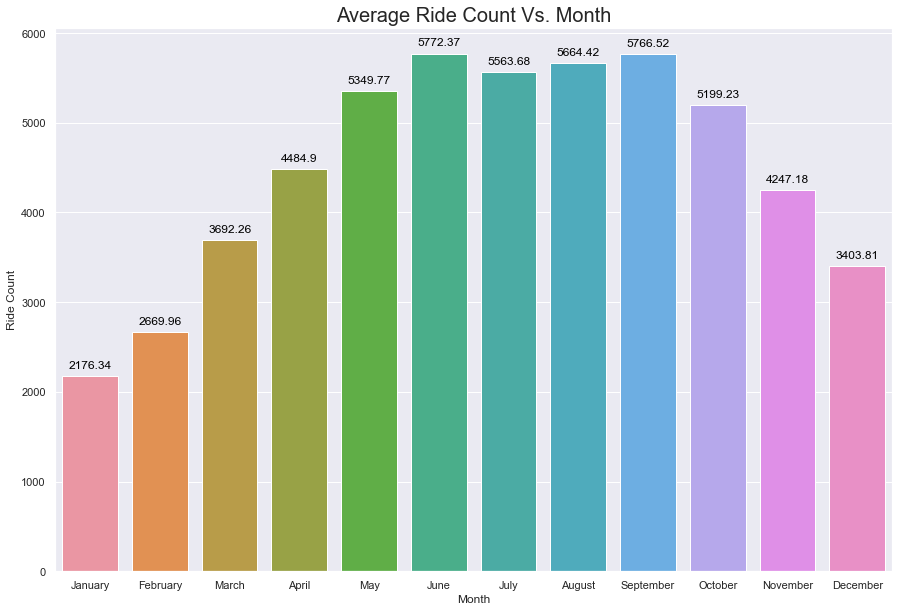

In [40]:
bar_graph_plot_function(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

In [41]:
###  cconverting month in unique value

bikes_data.mnth = bikes_data.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))


In [42]:
# Windspeed Column
bikes_data.windspeed.describe()


count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [43]:
# Casual, Registered Count & Total Count
#  these columns are not required, we will go ahead dropping these.

bikes_data = bikes_data.drop(columns=['casual', 'registered'])


In [44]:
pair_plot_data = pd.read_csv('C:/Users/Usr/Desktop/UPGRADE/bike sharing/day.csv', index_col='instant')


In [45]:
pair_plot_data['dteday'] = pair_plot_data['dteday'].apply(lambda x: int(x.split('-')[0]))
pair_plot_data = pair_plot_data.rename(columns={"dteday": "date"})
pair_plot_data['yr'] = pair_plot_data['yr'].map({0: 2018, 1:2019})
pair_plot_data = pair_plot_data.drop(columns=['atemp', 'casual', 'registered'])
pair_plot_data.at[int(pair_plot_data[pair_plot_data['hum'] == 0.0].hum.index.values), "hum"] = mean_value

In [46]:
pair_plot_data.head(10)


,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,1,2018,1,0,6,0,2,14.110847,80.5833,10.749882,985
2,2,1,2018,1,0,0,0,2,14.902598,69.6087,16.652113,801
3,3,1,2018,1,0,1,1,1,8.050924,43.7273,16.636703,1349
4,4,1,2018,1,0,2,1,1,8.200000,59.0435,10.739832,1562
5,5,1,2018,1,0,3,1,1,9.305237,43.6957,12.522300,1600
6,6,1,2018,1,0,4,1,1,8.378268,51.8261,6.000868,1606
7,7,1,2018,1,0,5,1,2,8.057402,49.8696,11.304642,1510
8,8,1,2018,1,0,6,0,2,6.765000,53.5833,17.875868,959
9,9,1,2018,1,0,0,0,1,5.671653,43.4167,24.250650,822


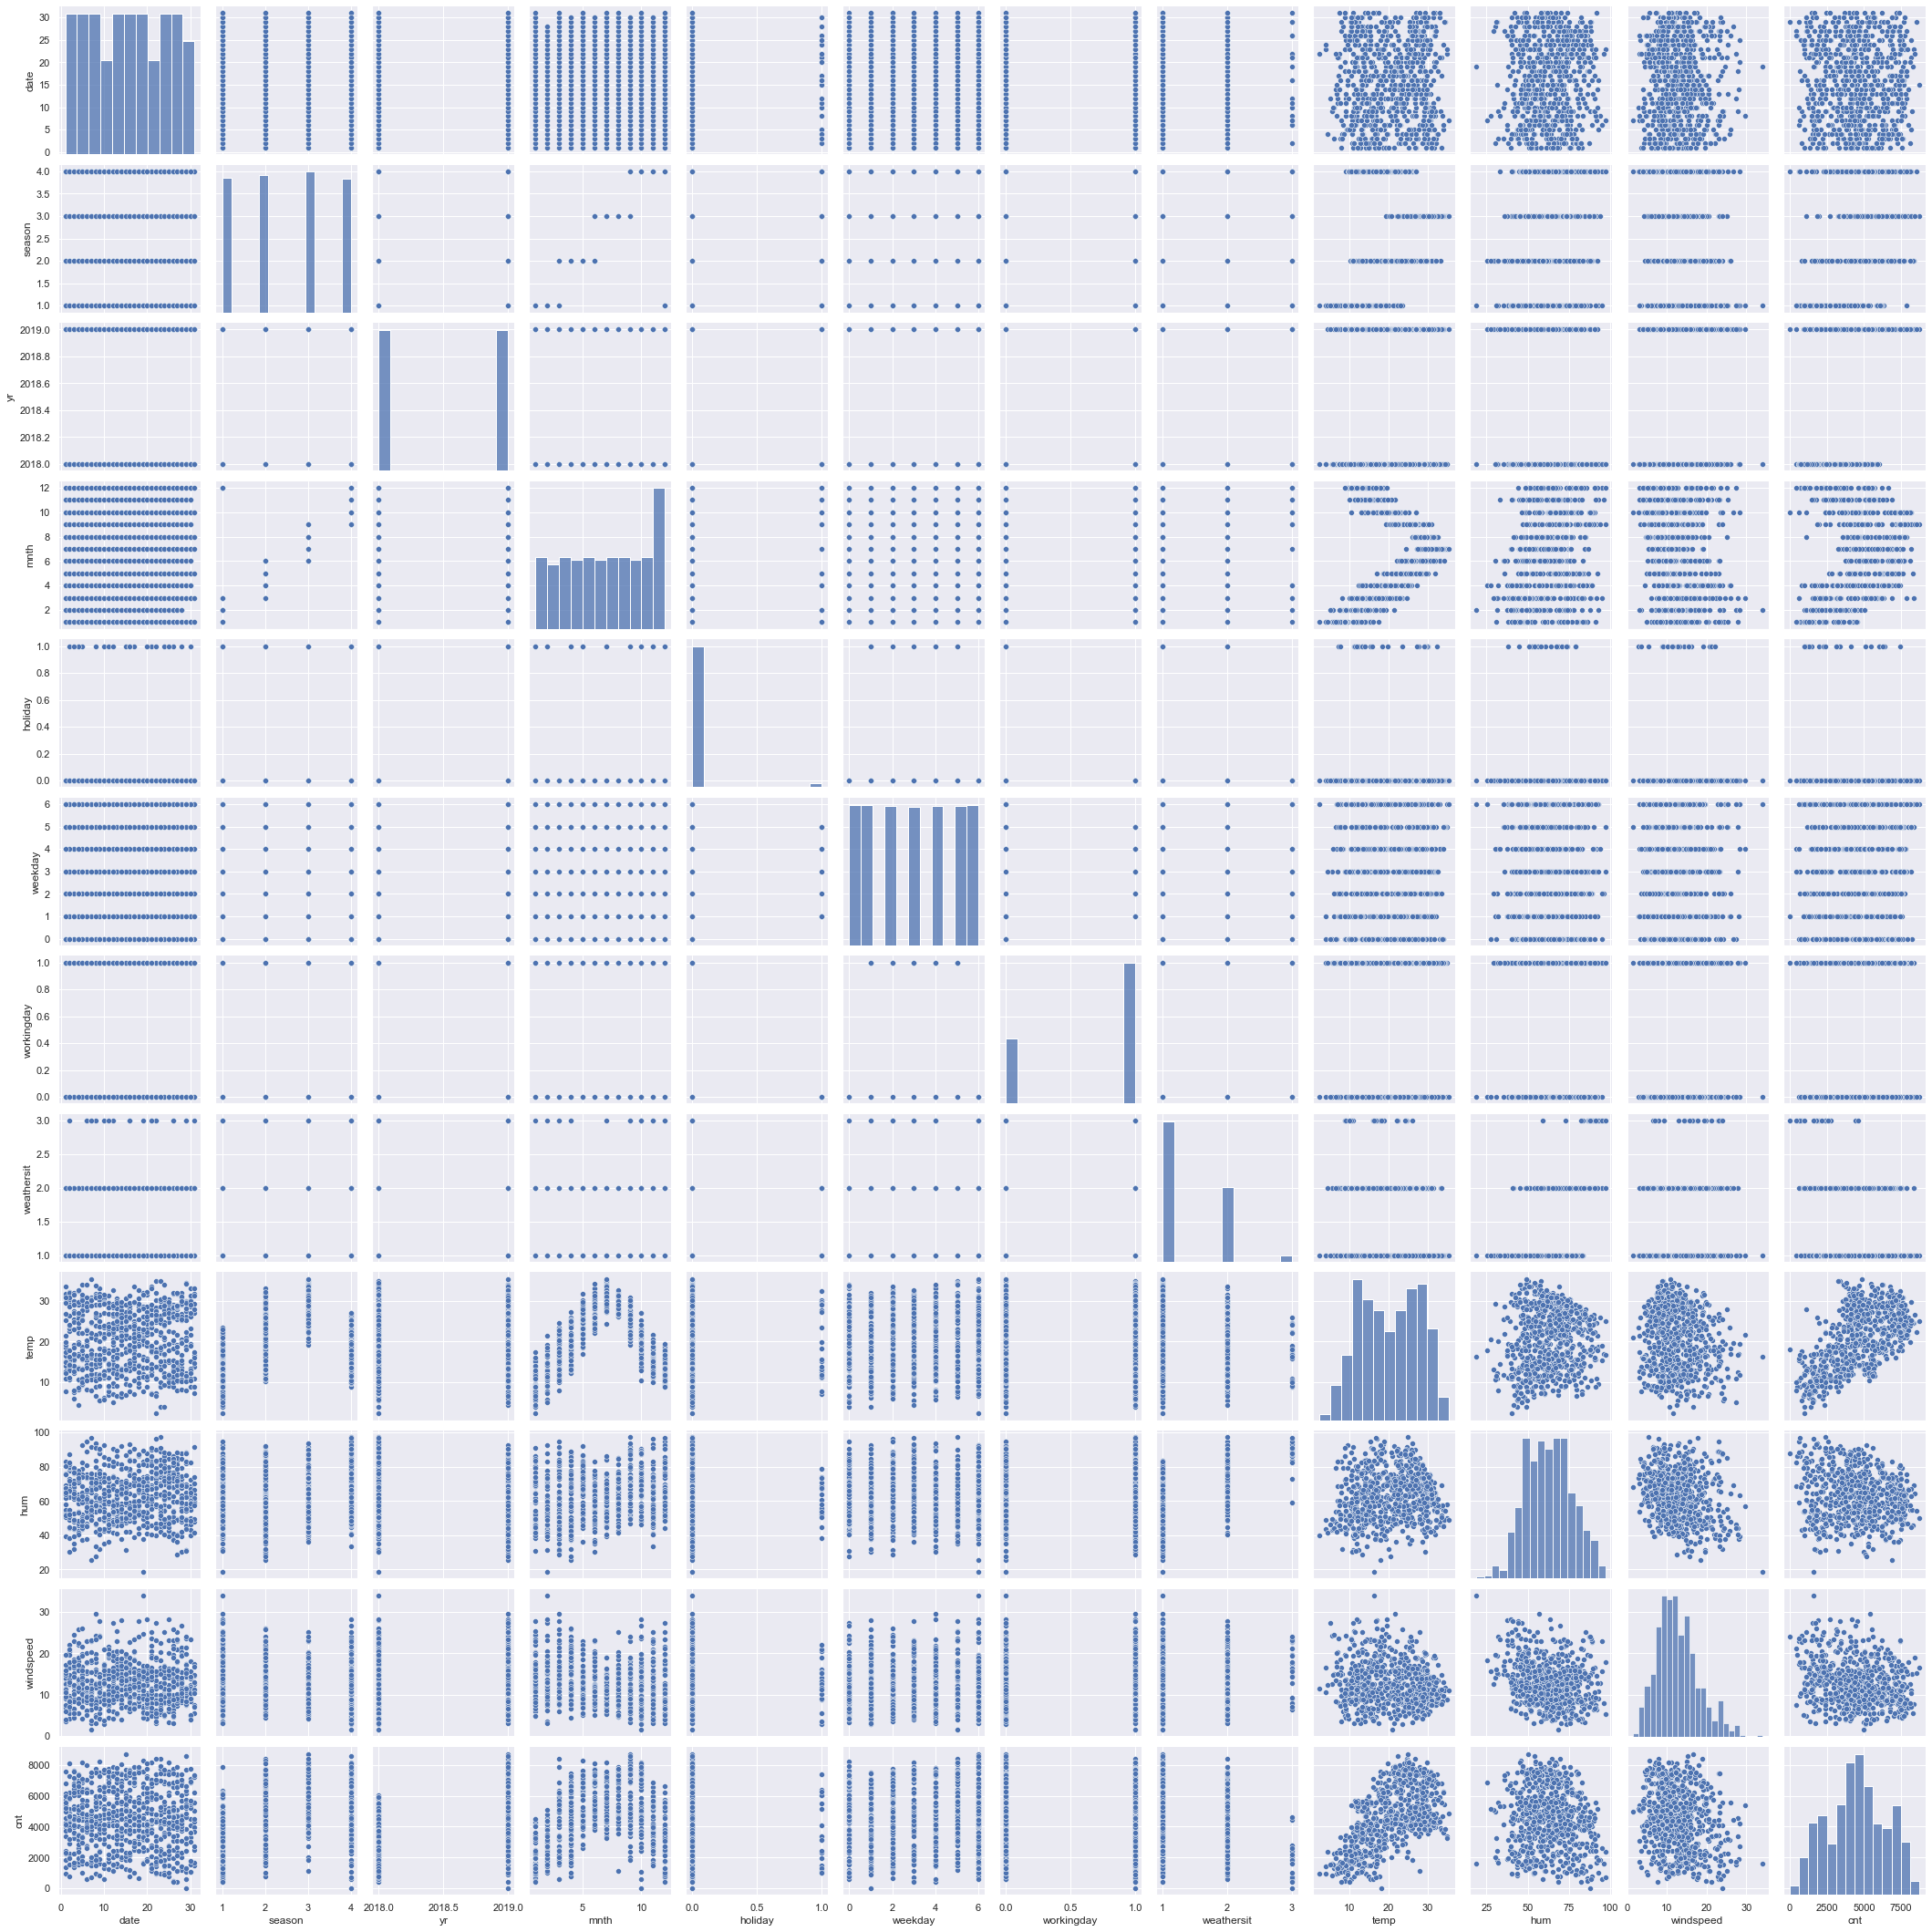

In [47]:
sns.pairplot(pair_plot_data)


# Data Transformation

In [48]:
dummy_variables_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [49]:
status = pd.get_dummies(bikes_data[dummy_variables_columns], drop_first=True)
status.head(10)

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
print(bikes_data.head(10))

   instant  date  season  yr     mnth  holiday    weekday  workingday  \
0        1     1  spring   0  January        0   Saturday           0   
1        2     2  spring   0  January        0     Sunday           0   
2        3     3  spring   0  January        0     Monday           1   
3        4     4  spring   0  January        0    Tuesday           1   
4        5     5  spring   0  January        0  Wednesday           1   
5        6     6  spring   0  January        0   Thursday           1   
6        7     7  spring   0  January        0     Friday           1   
7        8     8  spring   0  January        0   Saturday           0   
8        9     9  spring   0  January        0     Sunday           0   
9       10    10  spring   0  January        0     Monday           1   

         weathersit       temp     atemp      hum  windspeed   cnt  
0       Mist_cloudy  14.110847  18.18125  80.5833  10.749882   985  
1       Mist_cloudy  14.902598  17.68695  69.6087  16.6521

In [51]:
bikes_data = pd.concat([bikes_data, status], axis=1)

In [52]:
bikes_data = bikes_data.drop(columns=dummy_variables_columns)

In [53]:
bikes_data = bikes_data.drop(columns=['instant'])

# Data Splitting

In [54]:
df_train, df_test = train_test_split(bikes_data, train_size=0.7, random_state=100)

In [55]:
df_train.shape

(510, 31)

In [56]:
df_test.shape

(220, 31)

In [57]:
numerical_variables = ['date', 'temp', 'hum', 'windspeed', 'cnt']

In [58]:
scaler = MinMaxScaler()

In [59]:
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head(10)

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
576,1.000000,1,0,1,0.815169,33.14480,0.659744,0.264686,0.827658,0,...,0,0,0,0,0,0,1,0,0,0
426,0.066667,1,0,0,0.442393,20.67460,0.553780,0.255342,0.465255,0,...,0,0,0,1,0,0,0,0,0,1
728,0.966667,1,0,0,0.245101,11.58500,0.377528,0.663106,0.204096,0,...,0,0,0,0,1,0,0,0,0,0
482,0.900000,1,0,0,0.395666,18.87520,0.385516,0.188475,0.482973,0,...,1,0,0,1,0,0,0,0,0,1
111,0.700000,0,0,1,0.345824,16.09770,0.692225,0.380981,0.191095,0,...,1,0,0,0,0,0,0,0,0,1
580,0.100000,1,0,0,0.914852,37.56335,0.543663,0.462538,0.782559,1,...,0,0,0,1,0,0,0,0,0,0
500,0.500000,1,0,1,0.719639,29.79875,0.651757,0.172431,0.851588,0,...,1,0,0,0,0,0,0,1,0,0
479,0.800000,1,0,1,0.520271,23.51585,0.306709,0.164434,0.710308,0,...,1,0,0,0,0,0,0,1,0,0
472,0.566667,1,0,1,0.503656,22.85190,0.487220,0.270032,0.499885,0,...,1,0,0,0,0,0,0,1,0,1
455,0.000000,1,0,0,0.456929,20.86435,0.624068,0.279394,0.692476,0,...,1,0,0,0,1,0,0,0,0,1


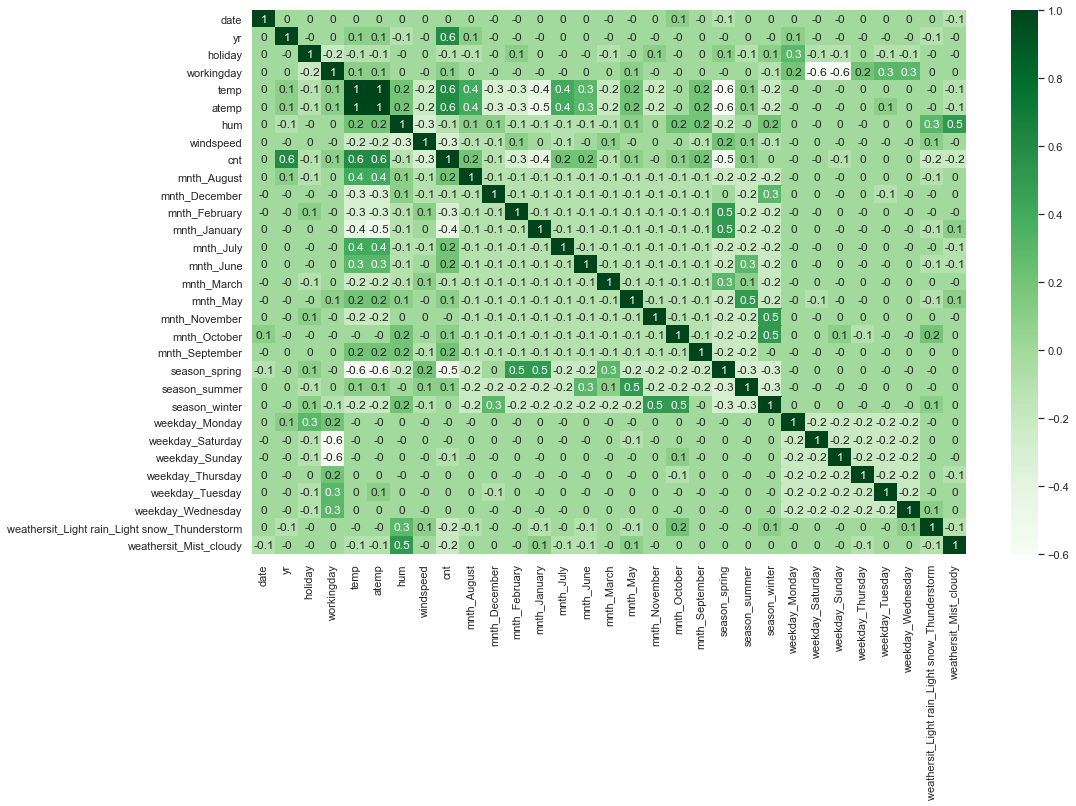

In [60]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Greens')
plt.show()

# Defining Target & Feature Variables for Iterative Modelling Process

In [61]:
y_train = df_train.pop('cnt')

In [62]:
X_train = df_train
print(X_train.columns)

Index(['date', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')


In [63]:
# Creating a generalised function for evaluating Variance Inflation Factor

def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [64]:
# RFE (Recursive Feature Elimination) Application

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)


In [65]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
29,weathersit_Mist_cloudy,True,1
21,season_winter,True,1
20,season_summer,True,1
19,season_spring,True,1
18,mnth_September,True,1
28,weathersit_Light rain_Light snow_Thunderstorm,True,1
23,weekday_Saturday,True,1
11,mnth_January,True,1
12,mnth_July,True,1
7,windspeed,True,1


# Model Building Process - 1

In [66]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.80e-191
Time:                        21:36:36   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -939.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2238      0.033      6.752      0.000       0.159       0.289
yr                                                0.2300      0.008     28.672      0.000       0.214       0.246
holiday                                          -0.0583      0.027     -2.169      0.031      -0.111      -0.005
workingday                                        0.0433      0.012      3.759      0.000       0.021       0.066
temp                                              0.5138      0.035     14.851      0.000       0.446       0.582
hum                                              -0.1350      0.032     -4.215      0.000      -0.198      -0.072
windspeed                                        -0.1885      0.026     -7.358      0.000      -0.239      -0.138
mnth_January                                     -0.0351      0.017     -2.025      0.043      -0.069      -0.001
mnth_July                                        -0.0535      0.018     -2.961      0.003      -0.089      -0.018
mnth_September                                    0.0816      0.016      4.959      0.000       0.049       0.114
season_spring                                    -0.0484      0.021     -2.336      0.020      -0.089      -0.008
season_summer                                     0.0515      0.015      3.467      0.001       0.022       0.081
season_winter                                     0.0945      0.017      5.456      0.000       0.060       0.129
weekday_Saturday                                  0.0530      0.015      3.657      0.000       0.025       0.082
weathersit_Light rain_Light snow_Thunderstorm    -0.2374      0.027     -8.785      0.000      -0.291      -0.184
weathersit_Mist_cloudy                           -0.0545      0.011     -5.148      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.723   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.476
Skew:                          -0.684   Prob(JB):                     1.42e-35
Kurtosis:                       5.384   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
fetch_vif_df(X_train_rfe)


,Features,VIF
0,hum,20.48
1,temp,15.20
2,workingday,5.26
3,windspeed,4.86
4,season_spring,4.07
5,season_winter,3.04
6,season_summer,2.68
7,weathersit_Mist_cloudy,2.47
8,yr,2.10
9,weekday_Saturday,1.97


# Model Building Process - 2

In [68]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.60e-188
Time:                        21:36:36   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1737      0.031      5.520      0.000       0.112       0.235
yr                                                0.2345      0.008     29.009      0.000       0.219       0.250
holiday                                          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                                        0.0464      0.012      3.966      0.000       0.023       0.069
temp                                              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                                        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
mnth_January                                     -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July                                        -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_September                                    0.0755      0.017      4.527      0.000       0.043       0.108
season_spring                                    -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer                                     0.0445      0.015      2.967      0.003       0.015       0.074
season_winter                                     0.0784      0.017      4.562      0.000       0.045       0.112
weekday_Saturday                                  0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light rain_Light snow_Thunderstorm    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist_cloudy                           -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
fetch_vif_df(X_train_rfe)


,Features,VIF
0,temp,7.07
1,workingday,5.24
2,windspeed,4.68
3,season_spring,3.07
4,season_summer,2.34
5,yr,2.08
6,season_winter,1.98
7,weekday_Saturday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


# Model Building Process - 3

In [70]:
# Dropping temp feature and designing model again

col = col.drop(['temp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.44e-154
Time:                        21:36:36   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5444      0.020     27.118      0.000       0.505       0.584
yr                                                0.2478      0.009     26.153      0.000       0.229       0.266
holiday                                          -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday                                        0.0478      0.014      3.466      0.001       0.021       0.075
windspeed                                        -0.1878      0.029     -6.426      0.000      -0.245      -0.130
mnth_January                                     -0.1026      0.020     -5.112      0.000      -0.142      -0.063
mnth_July                                        -0.0095      0.021     -0.446      0.656      -0.052       0.032
mnth_September                                    0.0710      0.020      3.610      0.000       0.032       0.110
season_spring                                    -0.2602      0.018    -14.483      0.000      -0.296      -0.225
season_summer                                    -0.0427      0.016     -2.651      0.008      -0.074      -0.011
season_winter                                    -0.0762      0.016     -4.903      0.000      -0.107      -0.046
weekday_Saturday                                  0.0562      0.017      3.243      0.001       0.022       0.090
weathersit_Light rain_Light snow_Thunderstorm    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
weathersit_Mist_cloudy                           -0.0882      0.010     -8.688      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
fetch_vif_df(X_train_rfe)


,Features,VIF
0,windspeed,4.27
1,workingday,3.83
2,season_spring,2.97
3,season_summer,2.29
4,season_winter,1.98
5,yr,1.91
6,weekday_Saturday,1.69
7,mnth_January,1.60
8,weathersit_Mist_cloudy,1.57
9,mnth_July,1.30


# Model Building Process - 4


In [72]:
# Dropping "mnth_July" feature and designing model again

col = col.drop(['mnth_July'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.73e-155
Time:                        21:36:37   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5406      0.018     29.655      0.000       0.505       0.576
yr                                                0.2478      0.009     26.179      0.000       0.229       0.266
holiday                                          -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday                                        0.0481      0.014      3.489      0.001       0.021       0.075
windspeed                                        -0.1877      0.029     -6.429      0.000      -0.245      -0.130
mnth_January                                     -0.1027      0.020     -5.118      0.000      -0.142      -0.063
mnth_September                                    0.0737      0.019      3.933      0.000       0.037       0.111
season_spring                                    -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_summer                                    -0.0393      0.014     -2.768      0.006      -0.067      -0.011
season_winter                                    -0.0730      0.014     -5.303      0.000      -0.100      -0.046
weekday_Saturday                                  0.0564      0.017      3.254      0.001       0.022       0.090
weathersit_Light rain_Light snow_Thunderstorm    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
weathersit_Mist_cloudy                           -0.0879      0.010     -8.685      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
fetch_vif_df(X_train_rfe)


,Features,VIF
0,windspeed,4.12
1,workingday,3.54
2,season_spring,2.68
3,season_summer,2.01
4,yr,1.89
5,season_winter,1.78
6,weekday_Saturday,1.62
7,mnth_January,1.60
8,weathersit_Mist_cloudy,1.57
9,mnth_September,1.20


# Model Building Process - 5

In [74]:
# Dropping "holiday" feature and designing model again

col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.01e-155
Time:                        21:36:37   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5332      0.018     30.023      0.000       0.498       0.568
yr                                                0.2480      0.009     26.146      0.000       0.229       0.267
workingday                                        0.0564      0.013      4.353      0.000       0.031       0.082
windspeed                                        -0.1887      0.029     -6.450      0.000      -0.246      -0.131
mnth_January                                     -0.1033      0.020     -5.138      0.000      -0.143      -0.064
mnth_September                                    0.0715      0.019      3.815      0.000       0.035       0.108
season_spring                                    -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_summer                                    -0.0394      0.014     -2.768      0.006      -0.067      -0.011
season_winter                                    -0.0743      0.014     -5.392      0.000      -0.101      -0.047
weekday_Saturday                                  0.0648      0.017      3.887      0.000       0.032       0.098
weathersit_Light rain_Light snow_Thunderstorm    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
weathersit_Mist_cloudy                           -0.0874      0.010     -8.623      0.000      -0.107      -0.067
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
fetch_vif_df(X_train_rfe)


,Features,VIF
0,windspeed,4.04
1,workingday,3.29
2,season_spring,2.65
3,season_summer,2.00
4,yr,1.88
5,season_winter,1.73
6,mnth_January,1.60
7,weathersit_Mist_cloudy,1.57
8,weekday_Saturday,1.56
9,mnth_September,1.18


# Linear Regrssion Assumptions

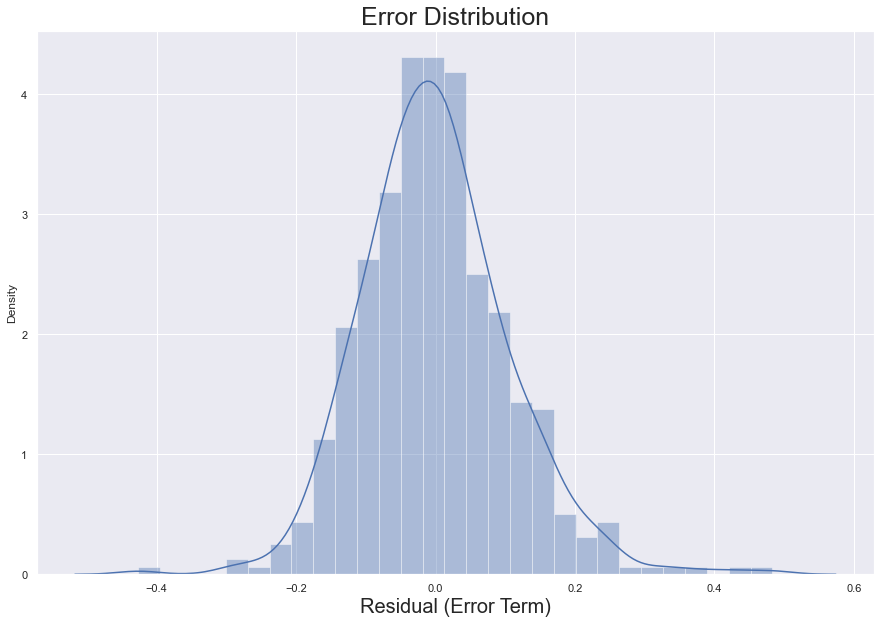

In [76]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

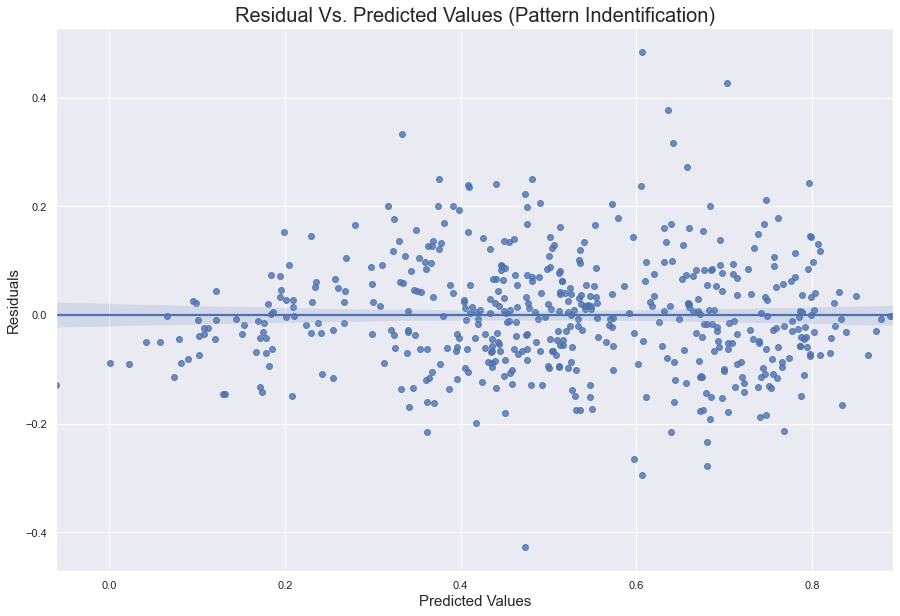

In [77]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [78]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(y_train_pred, residual)[0])


Pearson Value for Predicted Value Against Residual ==> 1.2715523078909996e-15


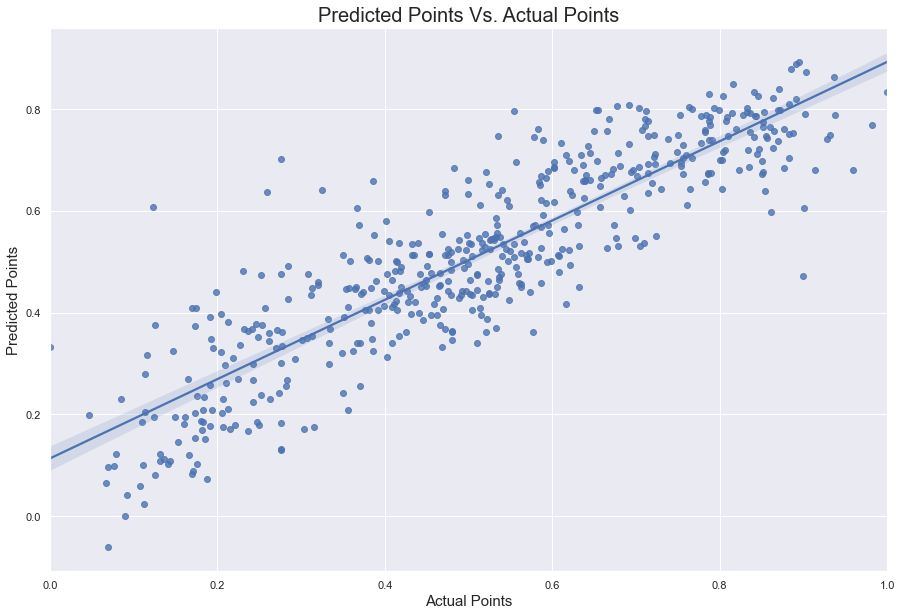

In [79]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()


In [80]:
fetch_vif_df(X_train_rfe)


,Features,VIF
0,windspeed,4.04
1,workingday,3.29
2,season_spring,2.65
3,season_summer,2.00
4,yr,1.88
5,season_winter,1.73
6,mnth_January,1.60
7,weathersit_Mist_cloudy,1.57
8,weekday_Saturday,1.56
9,mnth_September,1.18


In [81]:
## Evaluating Correlation Co-efficients of Predictors Impacting Target Variable (Individually)

corr_dict = {index: round(pearsonr(y_train, X_train_rfe[index])[0], 2) for index in X_train_rfe.columns}
corr_df = pd.DataFrame(corr_dict.values(), index=corr_dict.keys(), columns=['Correlation_Coefficient'])
corr_df.iloc[(-corr_df['Correlation_Coefficient'].abs()).argsort()]

,Correlation_Coefficient
yr,0.59
season_spring,-0.55
mnth_January,-0.38
windspeed,-0.25
weathersit_Light rain_Light snow_Thunderstorm,-0.23
mnth_September,0.20
weathersit_Mist_cloudy,-0.17
season_summer,0.14
workingday,0.09
season_winter,0.03


# Predicting on Test Data

In [82]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
184,0.100000,0,1,0,0.831783,33.27085,0.575080,0.084219,0.692706,0,...,0,0,1,0,0,0,0,0,0,1
535,0.633333,1,0,1,0.901354,36.04875,0.516506,0.153728,0.712034,0,...,1,0,0,0,0,0,0,1,0,0
299,0.866667,0,0,1,0.511964,22.85230,0.798722,0.334206,0.303382,0,...,0,1,0,0,0,1,0,0,0,1
221,0.300000,0,0,1,0.881625,34.24915,0.301917,0.339570,0.547400,1,...,0,0,0,0,0,0,0,1,0,0
152,0.033333,0,0,1,0.817246,32.19710,0.149627,0.537414,0.569029,0,...,1,0,0,0,0,1,0,0,0,0
404,0.266667,1,0,1,0.256524,13.09940,0.478167,0.326196,0.438104,0,...,0,0,0,0,0,1,0,0,0,0
198,0.566667,0,0,1,0.856704,35.19625,0.592119,0.372990,0.510354,0,...,0,0,1,0,0,0,0,0,0,0
171,0.666667,0,0,1,0.774672,31.88230,0.744409,0.276724,0.553728,0,...,0,0,0,0,0,0,1,0,0,1
512,0.900000,1,1,0,0.814131,33.96500,0.624068,0.331536,0.692706,0,...,1,0,1,0,0,0,0,0,0,0
200,0.633333,0,0,1,0.883701,37.34250,0.663471,0.153738,0.495858,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
# Fixing Test Target Variable

y_test = df_test.pop('cnt')


In [84]:
# Fixing Test Feature(s) Variable

X_test = df_test


In [85]:
# Filtering Test Input (& Reserving Required Features Only)

X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)


In [86]:
# Predicting Test Data Using Developed Model

y_pred = lr_model.predict(X_test_new)


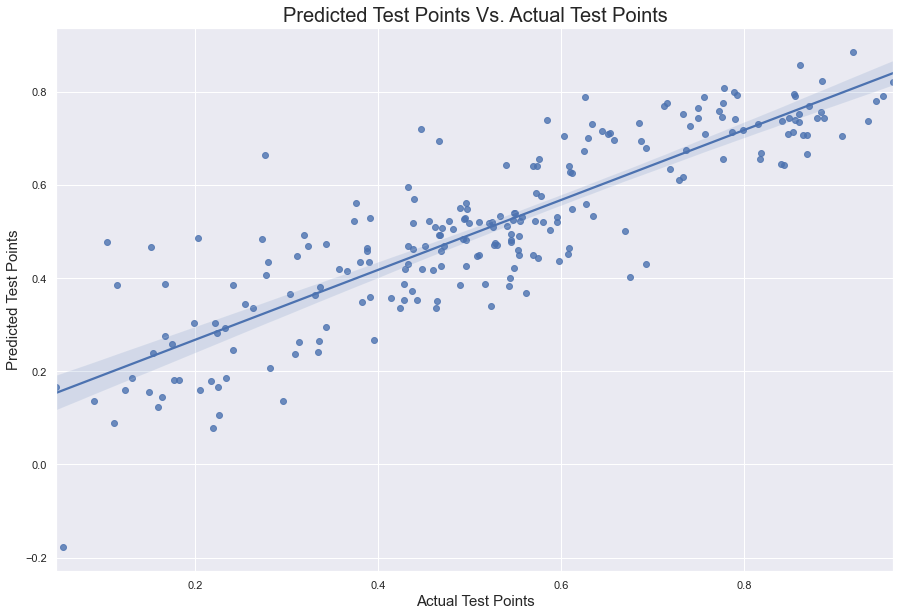

In [87]:
corr_plot = sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [88]:
# R- square

from sklearn.metrics import r2_score
rq2 = r2_score(y_test, y_pred)
print(rq2)

0.7417351441317018


In [89]:
# summary 

lr1 = sm.OLS(y_test, X_test_new)
lr1_model = lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     63.13
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           4.15e-60
Time:                        21:36:39   Log-Likelihood:                 183.71
No. Observations:                 220   AIC:                            -343.4
Df Residuals:                     208   BIC:                            -302.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5139      0.027     18.764      0.000       0.460       0.568
yr                                                0.2464      0.015     16.555      0.000       0.217       0.276
workingday                                        0.0543      0.020      2.774      0.006       0.016       0.093
windspeed                                        -0.0528      0.049     -1.072      0.285      -0.150       0.044
mnth_January                                     -0.0327      0.032     -1.022      0.308      -0.096       0.030
mnth_September                                    0.0613      0.028      2.201      0.029       0.006       0.116
season_spring                                    -0.3272      0.024    -13.538      0.000      -0.375      -0.280
season_summer                                    -0.0405      0.022     -1.873      0.062      -0.083       0.002
season_winter                                    -0.0682      0.022     -3.103      0.002      -0.111      -0.025
weekday_Saturday                                  0.0494      0.027      1.800      0.073      -0.005       0.103
weathersit_Light rain_Light snow_Thunderstorm    -0.2849      0.047     -6.117      0.000      -0.377      -0.193
weathersit_Mist_cloudy                           -0.0711      0.016     -4.398      0.000      -0.103      -0.039
==============================================================================
Omnibus:                       16.676   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.607
Skew:                          -0.514   Prob(JB):                     1.23e-05
Kurtosis:                       4.187   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""